<a href="https://colab.research.google.com/github/andrewsuadnya/Dogs-vs-Cat-Classification/blob/main/Dogs_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Dogs vs Cat Classification

## Problem:
Klasifikasi Kucing dan Anjing merupakan permasalahan dasar untuk model CNN(convolutional neural network) yang melibatkan klasifikasi gambar sebagai anjing atau kucing. Dataset ini berguna untuk belajar bagaimana mengembangkan, mengevaluasi, dan menggunakan jaringan saraf konvolusional dalam klasifikasi gambar. Ini termasuk pembuatan kerangka uji yang kuat untuk menilai kinerja model, mencari perbaikan model dengan mengubah parameter-parameter model, serta menyimpan dan memuat model untuk melakukan prediksi pada data baru.

## Import Library
Bagian ini digunakan untuk memanggil library yang dibutuhkan dalam proses Image Classification/Klasifikasi Gambar. Library ini berfungsi untuk membantu dalam proses pengolahan data, visualisasi data, pembuatan model, dan lainnya.

In [ ]:
#Modul os menyediakan cara berinteraksi dengan sistem operasi. Digunakan untuk operasi file dan direktori.
import os

# makedirs adalah fungsi untuk membuat direktori secara rekursif.
from os import makedirs

# listdir adalah fungsi untuk mendapatkan daftar entri di direktori yang diberikan.
from os import listdir

#copyfile digunakan untuk menyalin konten dari file sumber ke file tujuan.
from shutil import copyfile

#seed digunakan untuk menginisialisasi pembangkit bilangan acak.
from random import seed

#random digunakan untuk menghasilkan bilangan acak.
from random import random

#numpy adalah perpustakaan kuat untuk operasi numerik. Memberikan dukungan untuk array, matriks, dan fungsi matematika.
import numpy as np

#pandas adalah perpustakaan manipulasi dan analisis data. Memberikan struktur data seperti DataFrame, yang banyak digunakan untuk menangani data terstruktur.
import pandas as pd

# visuals
#seaborn dan matplotlib adalah perpustakaan visualisasi. Digunakan untuk membuat berbagai jenis plot dan grafik.
import seaborn as sns
import matplotlib.pyplot as plt

#imread dari matplotlib.image digunakan untuk membaca gambar.
from matplotlib.image import imread

#PIL (Python Imaging Library) digunakan untuk membuka, memanipulasi, dan menyimpan berbagai format file gambar.
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
# tensorflow adalah perpustakaan pembelajaran mesin, dan keras adalah API untuk membangun jaringan saraf di atas TensorFlow.
import tensorflow as tf

# Sequential digunakan untuk membuat tumpukan linear lapisan untuk jaringan saraf.
from tensorflow.keras.models import Sequential

# ImageDataGenerator digunakan untuk augmentasi data waktu nyata selama pelatihan model.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Berbagai lapisan (Dense, MaxPooling2D, Dropout, Flatten, BatchNormalization, Conv2D) adalah blok bangunan untuk mengonstruksi jaringan saraf konvolusional (CNN).
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D

# Callback (ReduceLROnPlateau, EarlyStopping) digunakan untuk menyesuaikan tingkat pembelajaran dan menghentikan pelatihan lebih awal berdasarkan kondisi tertentu
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

##Connect to Google Drive

Bagian ini bertujuan untuk menghubungkan colab dengan Google Drive. Dengan demikian, file yang ada di Google Drive dapat diakses dan dimanipulasi langsung dari colab. Ini berguna ketika bekerja dengan dataset besar yang disimpan di Google Drive.


In [ ]:
# import package untuk menghubungkan ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

Bagian ini bertujuan untuk memuat dataset yang akan digunakan. Dataset biasanya berisi gambar-gambar yang telah diberi label, dalam hal ini adalah gambar kucing dan anjing. Proses ini melibatkan pembacaan file gambar dari direktori yang ditentukan dan ekstraksi label dari nama file atau direktori.

**Pada code ini, dibuat path untuk data train dan test nya. Disini total data train yang digunakan adalah 2000 (1000 kucing dan 1000 anjing) dengan data test sebanyak 200 data.**

In [ ]:
train_path = "/content/drive/MyDrive/machine learning_dataset/sample/train"
test_path = "/content/drive/MyDrive/machine learning_dataset/sample/test"

# melihat data dan menentukan label dari data tersebut menggunakan nama gambar, misalnya : cat.876.jpg maka label adalah cat
filenames = os.listdir(train_path)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head(100)

,filename,label
0,cat.998.jpg,cat
1,dog.10.jpg,dog
2,dog.1.jpg,dog
3,dog.100.jpg,dog
4,dog.101.jpg,dog
...,...,...
95,dog.180.jpg,dog
96,dog.184.jpg,dog
97,dog.186.jpg,dog
98,dog.189.jpg,dog


## Data Exploration

Bagian ini digunakan untuk melakukan eksplorasi awal dari data yang telah dimuat. Eksplorasi ini berupa visualisasi data, pengecekan distribusi label, dll. Tujuannya untuk mendapatkan pemahaman yang lebih baik tentang data yang akan digunakan untuk melatih model.


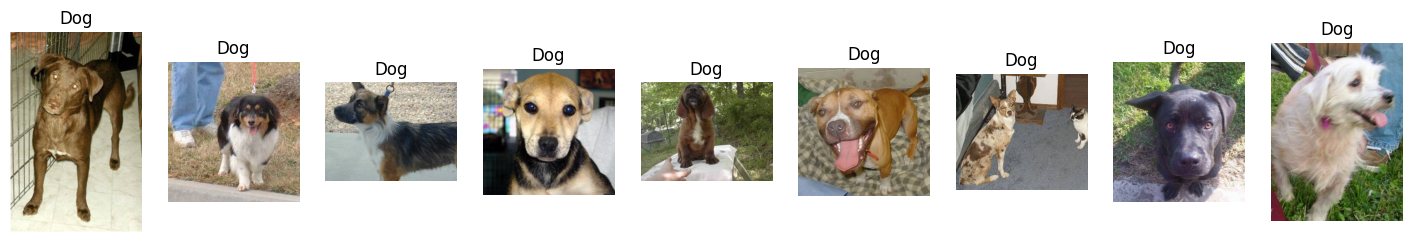

In [ ]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

for i in range(1,10):
    plt.subplot(1,10, i+1)
    filename = '/content/drive/MyDrive/machine learning_dataset/sample/train/' + 'dog.' + str(i) + '.jpg'
    try:
        image = imread(filename)
        plt.imshow(image)
        plt.title('Dog', fontsize=12)
        plt.axis('off')
    except FileNotFoundError:
        print(f"File not found: {filename}")

plt.show()

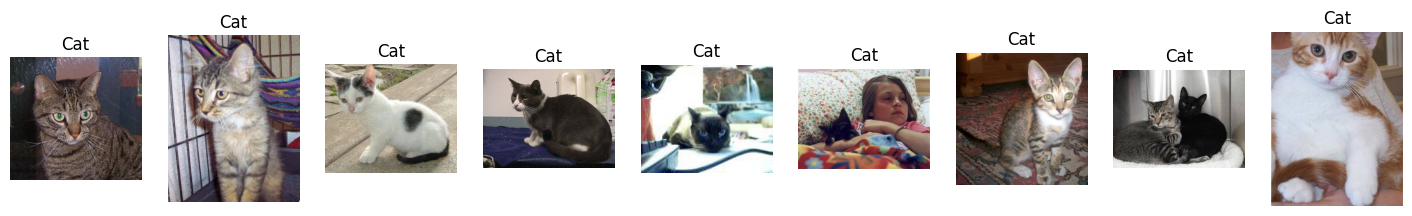

In [ ]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

for i in range(1,10):
    plt.subplot(1, 10, i+1)
    filename = '/content/drive/MyDrive/machine learning_dataset/sample/train/' + 'cat.' + str(i) + '.jpg'
    try:
        image = imread(filename)
        plt.imshow(image)
        plt.title('Cat', fontsize=12)
        plt.axis('off')
    except FileNotFoundError:
        print(f"File not found: {filename}")

plt.show()

Kesimpulan hasil eksplorasi sebagai berikut:
- Gambar yang digunakan memiliki ukuran yang beragam
- Ada beberapa gambar dimana objek pada gambar tidak hanya kucing atau anjing, tapi juga ada gambar manusia

# Test, Train, Split (70, 20, 10)

Bagian ini membagi dataset menjadi 3 bagian, yaitu data untuk proses training (train) = 70%, data untuk testing (test) = 30%, dan data untuk validation (val) = 10%.

**Pembagian ini penting untuk membantu dalam mencegah overfitting dan underfitting.**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame with features and labels
labels = data['label']

# Split into 70% train, 30% test and validation combined
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

# Split the remaining 30% into 20% test and 10% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=200, stratify=y_temp, random_state=42)

print('The shape of train data:', X_train.shape)
print('The shape of test data:', X_test.shape)
print('The shape of validation data:', X_val.shape)

The shape of train data: (1400, 2)
The shape of test data: (400, 2)
The shape of validation data: (200, 2)


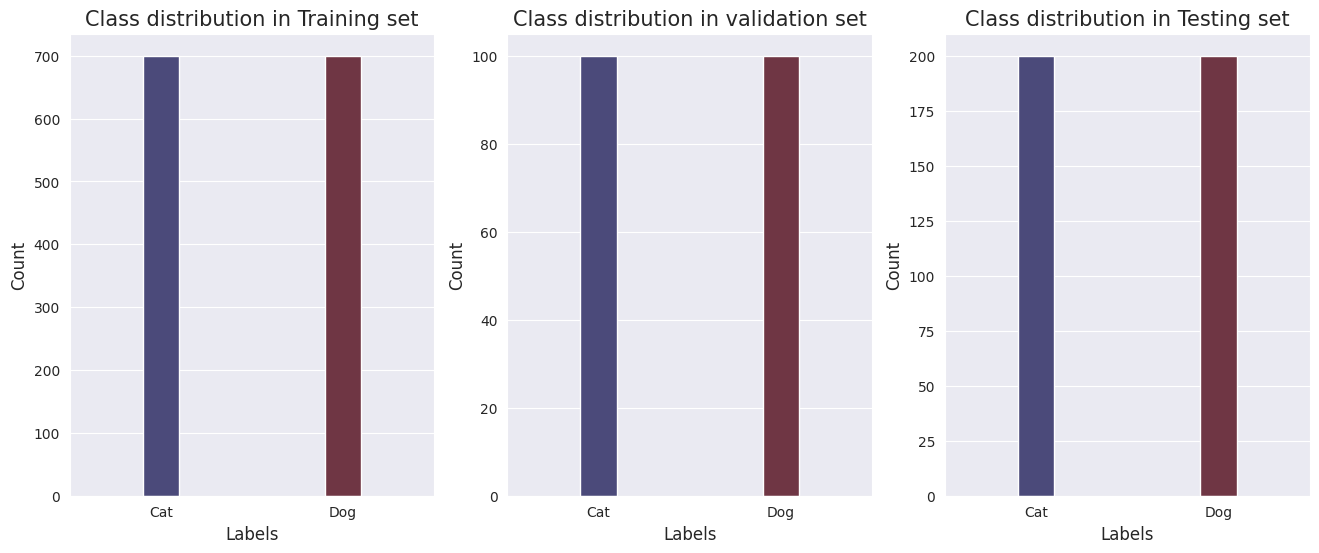

In [ ]:
# Proses visualisasi dari data train, test dan validation
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(16,6))
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

## Data Preparation

**Menentukan parameter untuk proses mengenerate data test, train, dan valdation**

Bagian ini bertugas untuk mempersiapkan data sebelum masuk ke model. Persiapan ini bisa berupa normalisasi, augmentasi, dan lain sebagainya. Normalisasi biasanya melibatkan penyesuaian skala nilai piksel gambar, sedangkan augmentasi melibatkan pembuatan variasi data melalui transformasi seperti rotasi, flip, zoom, dan lainnya.

In [ ]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32


Penjelasan:
image_size = 128 --> Variabel ini menentukan ukuran dimensi gambar. Dalam hal ini, gambar diasumsikan memiliki ukuran 128x128 piksel.
image_channel = 3 --> Variabel ini menentukan jumlah saluran warna pada setiap piksel gambar. Dalam konteks ini, angka 3 menunjukkan bahwa gambar diasumsikan memiliki tiga saluran warna, yang mewakili warna dasar RGB (Red, Green, Blue).
bat_size = 32: --> Variabel ini menentukan ukuran batch (kelompok) data yang akan diproses oleh model pada setiap iterasi pelatihan. Dalam hal ini, model akan memproses 32 gambar sekaligus pada setiap langkah pelatihan.

## Image Data Generator : Modify

Bagian ini membuat generator data gambar yang akan digunakan untuk augmentasi data pada saat pelatihan model. Augmentasi data adalah teknik untuk menciptakan variasi data latih melalui transformasi seperti rotasi, flip, zoom, shear, dan shift gambar. Ini membantu dalam meningkatkan variasi dalam data latih dan mencegah overfitting.

In [ ]:
# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

Code diatas antara lain untuk:
- ImageDataGenerator ini akan digunakan untuk augmentasi data pada saat pelatihan model.
- rotation_range=15: Merotasi gambar hingga 15 derajat.
- horizontal_flip=True: Membalik gambar secara horizontal.
- zoom_range=0.2: Melakukan zoom in atau zoom out pada gambar hingga 20%.
- shear_range=0.1: Melakukan shear transformation pada gambar.
- fill_mode='reflect': Metode pengisian piksel yang hilang setelah augmentasi, dalam hal ini menggunakan metode reflect.
- width_shift_range=0.1 dan height_shift_range=0.1: Menggeser gambar secara horizontal dan vertikal hingga 10%.

## Using Dataframe

Bagian ini digunakan untuk membuat generator data pelatihan, validasi, dan pengujian. Generator ini membaca data gambar dan label dari data frame Pandas dan menghasilkan batch data yang sesuai untuk pelatihan atau evaluasi model CNN.


In [ ]:

train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = '/content/drive/MyDrive/machine learning_dataset/sample/train/',
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size) #(128,128)
                                                   )
val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = '/content/drive/MyDrive/machine learning_dataset/sample/train/',
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = '/content/drive/MyDrive/machine learning_dataset/sample/train/',
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 1400 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


## CNN Model

Code ini mendefinisikan arsitektur model CNN (Convolutional Neural Network) menggunakan Keras dengan Sequential API.

1. Input Layer: Layer pertama adalah Convolutional Layer dengan 32 filter, masing-masing berukuran 3x3, fungsi aktivasi ReLU, dan input shape seukuran (image_size, image_size, image_channel). Dilanjutkan dengan Batch Normalization, Max Pooling dengan filter 2x2, dan Dropout setelahnya.

2. Block 1: Terdapat Convolutional Layer kedua dengan 64 filter, Batch Normalization, Max Pooling, dan Dropout.

3. Block 2: Convolutional Layer ketiga dengan 128 filter, Batch Normalization, Max Pooling, dan Dropout.

4. Block 3: Convolutional Layer keempat dengan 256 filter, Batch Normalization, Max Pooling, dan Dropout.

5. Fully Connected Layers: Dilanjutkan dengan lapisan-lapisan fully connected, yaitu Flatten untuk meratakan output, Dense Layer dengan 512 neuron dan aktivasi ReLU, Batch Normalization, dan Dropout.

6. Output Layer: Terakhir, output layer dengan 2 neuron (karena klasifikasi antara dua kategori: anjing dan kucing) dan fungsi aktivasi softmax.

7. Summary: Menampilkan rangkuman dari arsitektur model, termasuk jumlah parameter yang akan dipelajari oleh model.

In [ ]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

## Callbacks
Code ini menggunakan dua callback yang umum digunakan dalam pelatihan model neural network dengan Keras:

1. ReduceLROnPlateau (Learning Rate Reduction): monitor='val_accuracy': Memonitor metrik validasi akurasi model.

2. EarlyStopping:monitor='val_loss': Memonitor metrik validasi loss model.

Callback ini berfungsi untuk menyesuaikan learning rate dan menghentikan pelatihan lebih awal berdasarkan kondisi tertentu. ReduceLROnPlateau akan menurunkan learning rate ketika metrik tertentu berhenti membaik, sedangkan EarlyStopping akan menghentikan pelatihan ketika metrik tertentu berhenti membaik setelah beberapa epoch.

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

##Compile Model

Bagian ini menggunakan fungsi compile pada model Keras untuk mengonfigurasi proses pelatihan, seperti optimizer, loss function, dan metrics. Optimizer bertugas untuk memperbarui bobot model berdasarkan gradien loss function, loss function digunakan untuk mengukur seberapa baik model dalam melakukan prediksi, dan metrics digunakan untuk mengukur kinerja model selama pelatihan dan pengujian.

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Fit Model

Bagian ini melakukan proses pelatihan (training) model menggunakan data generator dan callback yang telah ditentukan sebelumnya. Proses ini melibatkan forward pass, di mana model membuat prediksi berdasarkan data latih, dan backward pass, di mana model memperbarui bobotnya berdasarkan gradien loss function.

In [ ]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator,
                    callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 5,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/5
44/44 [==============================] - 100s 2s/step - loss: 0.8977 - accuracy: 0.6050 - val_loss: 1.0265 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/5
44/44 [==============================] - 92s 2s/step - loss: 0.7051 - accuracy: 0.6536 - val_loss: 0.9434 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/5
44/44 [==============================] - ETA: 0s - loss: 0.6508 - accuracy: 0.6629
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
44/44 [==============================] - 94s 2s/step - loss: 0.6508 - accuracy: 0.6629 - val_loss: 1.3947 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/5
44/44 [==============================] - 90s 2s/step - loss: 0.6217 - accuracy: 0.6879 - val_loss: 2.0940 - val_accuracy: 0.5000 - lr: 5.0000e-04
Epoch 5/5
44/44 [==============================] - ETA: 0s - loss: 0.5891 - accuracy: 0.7057
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
44/44 [==============================] - 93s 2s/step - loss

## Plot the Result

Bagian ini menampilkan hasil pelatihan (training) yang membandingkan grafik accuracy dan loss model pada data pelatihan dan validasi. Grafik ini membantu dalam memahami bagaimana model belajar selama proses pelatihan dan apakah ada tanda-tanda overfitting atau underfitting.

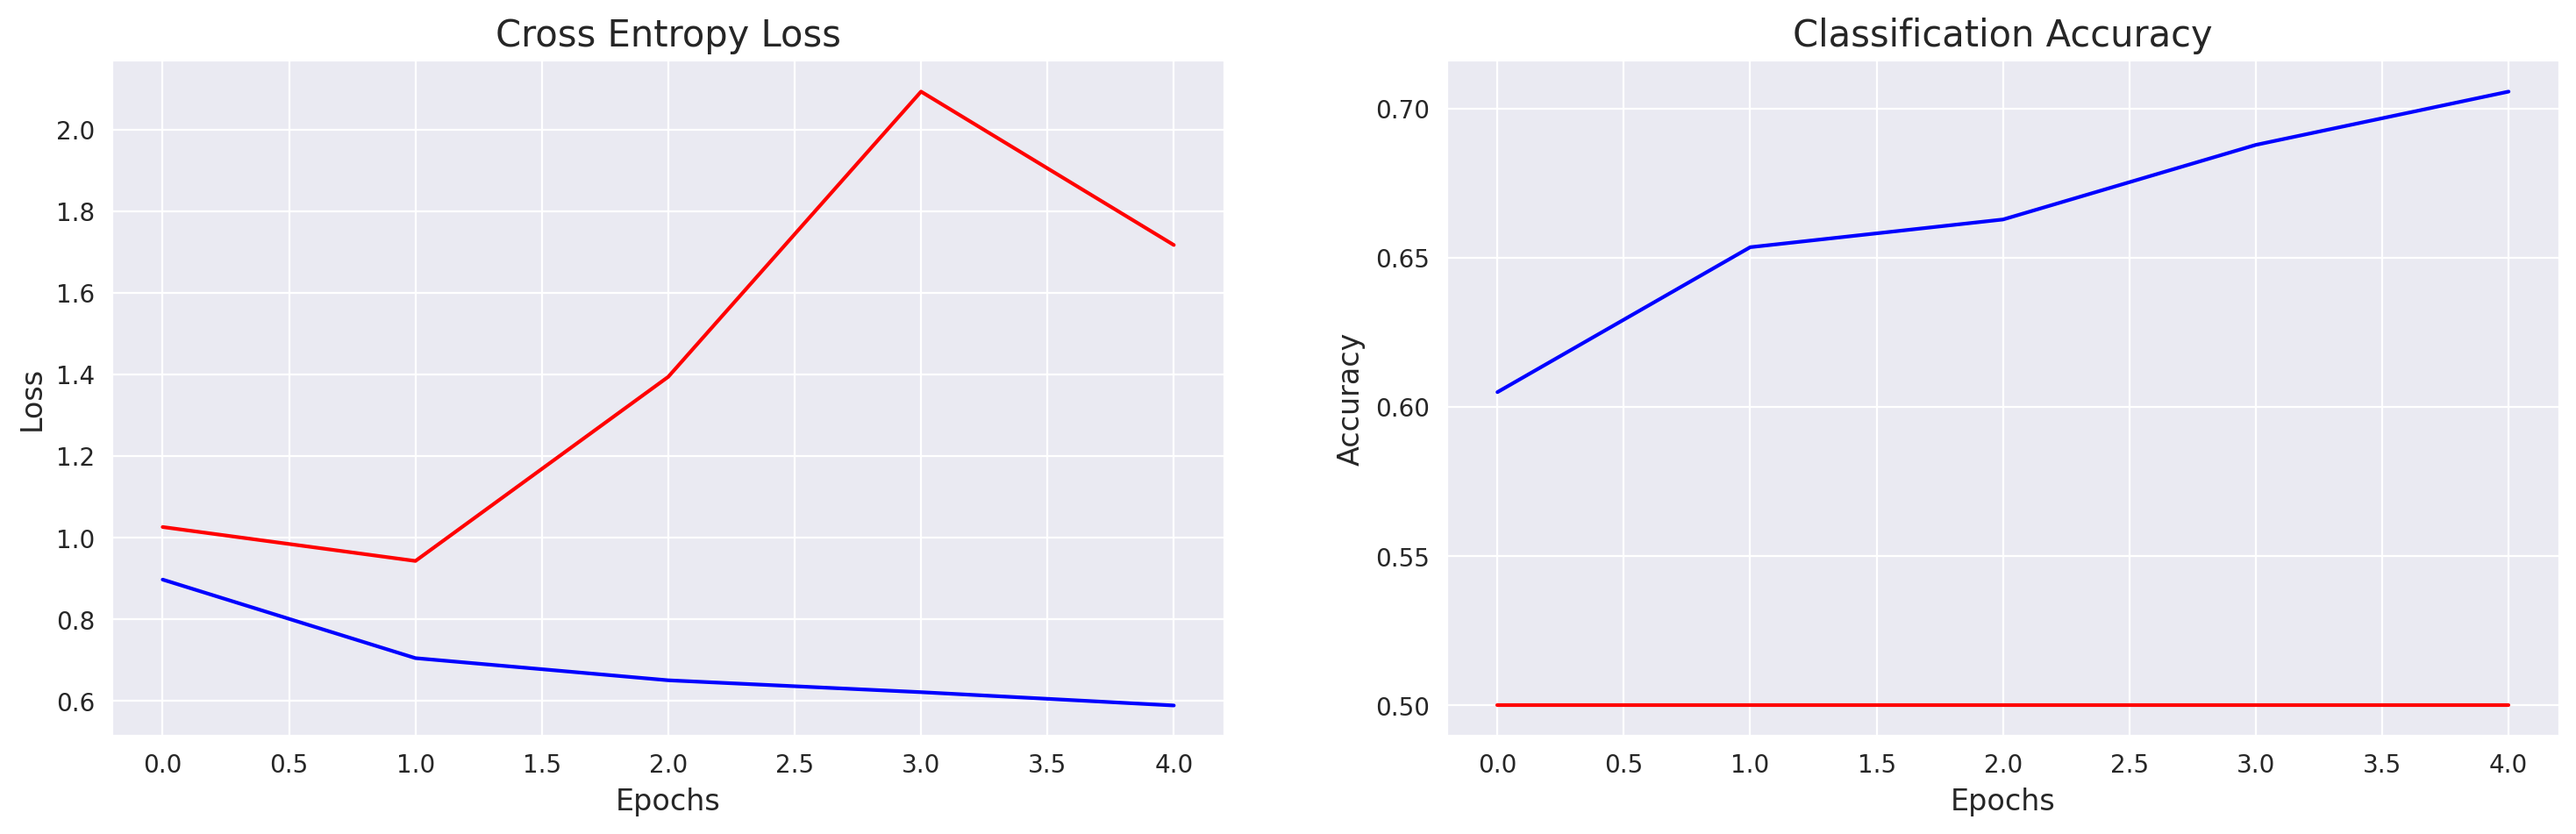

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'], color="blue")
plt.plot(error['val_loss'], color = "red")

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'], color="blue")
plt.plot(error['val_accuracy'], color="red")

plt.show()



1.   **Cross Entropy Loss**: Grafik ini menunjukkan bagaimana kesalahan model, atau ‘loss’, berubah selama proses pelatihan. Dari grafik ini, tampak bahwa loss mencapai puncak di sekitar 2.0 di 3.0 epoch dan kemudian menurun menjadi sekitar 1.6 di 4.0 epoch. Ini menunjukkan bahwa model telah belajar dari data latih dan menjadi lebih baik dalam memprediksi label gambar.

2.   **Classification Accuracy**: Grafik ini menunjukkan bagaimana akurasi model berubah selama proses pelatihan. Dari grafik ini, tampak bahwa akurasi meningkat secara stabil dari sekitar 0.60 di 0.0 epoch menjadi sekitar 0.70 di 4.0 epoch. Ini menunjukkan bahwa model menjadi lebih akurat dalam memprediksi label gambar seiring berjalannya waktu.



## Evaluation

Bagian ini untuk mengevaluasi kinerja model yang telah dibuat dengan menggunakan data train dan validation generator, serta menampilkan akurasi dan loss model pada setiap data. Evaluasi ini penting untuk memahami seberapa baik model dalam membuat prediksi pada data yang belum pernah dilihatnya sebelumnya.

In [ ]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 50.0
The Loss of the model for training data is: 0.9449464678764343
The accuracy of the model for validation data is: 50.0
The Loss of the model for validation data is: 0.9433514475822449


## Prediction

Bagian ini bertugas untuk memprediksi hasil model dengan menggunakan data test generator dan menampilkan akurasi dan loss model pada data test. Prediksi ini melibatkan penggunaan model untuk membuat prediksi label berdasarkan gambar dalam data test.

In [ ]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 50.0
The Loss of the model for testing data is: 0.9447944760322571


## Classification Report and Confusion Matrix

Bagian ini menampilkan hasil confusion matrix dan classification report dari model, seperti precision, recall, f1-score, dan support untuk setiap kelas, serta menampilkan heatmap dari confusion matrix. Confusion matrix adalah tabel yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas, sedangkan classification report menunjukkan metrik evaluasi lainnya untuk setiap kelas.

In [ ]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.50      1.00      0.67       200
         Dog       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


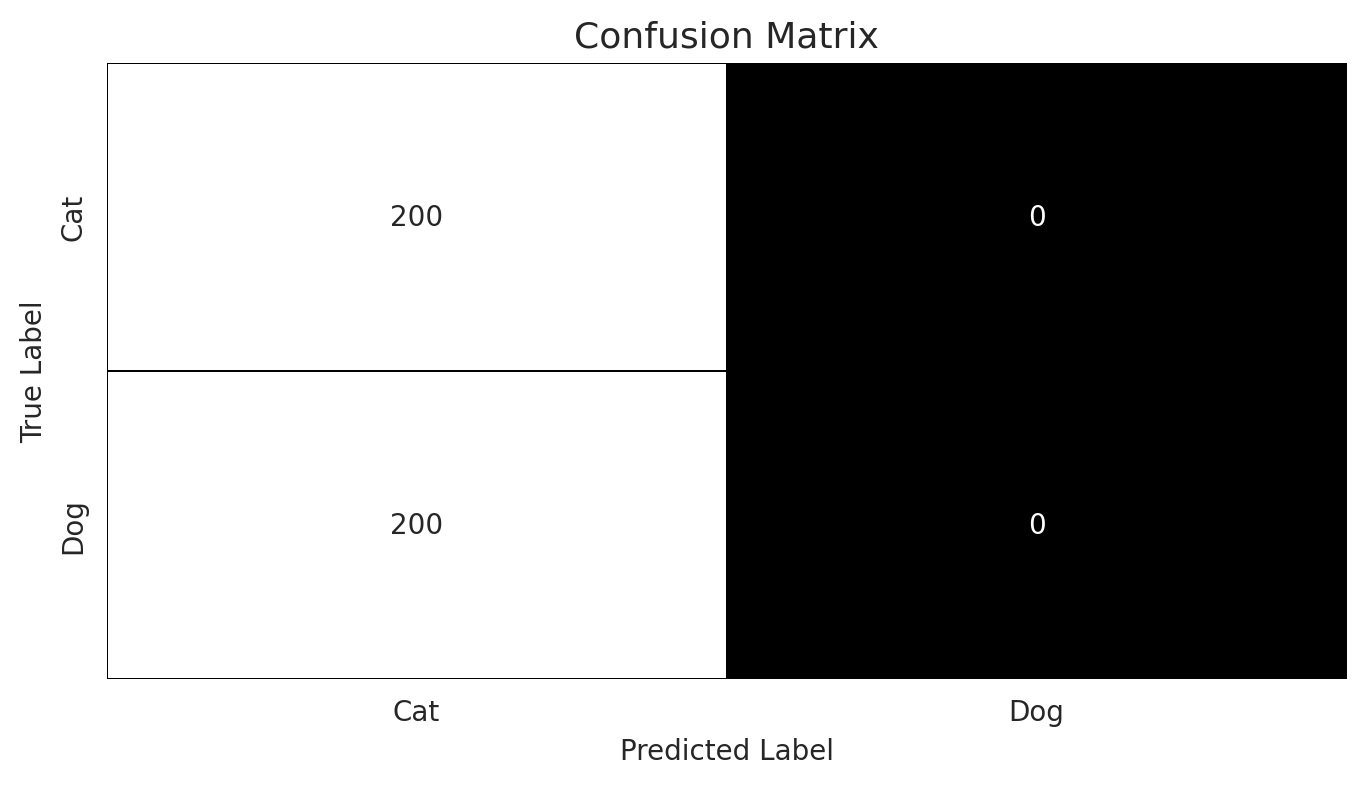

In [ ]:
confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()

**Hasil analisis model klasifikasi Gambar menggunakan Confusion Matrix**


*   True Positives (TP): Model berhasil memprediksi 200 gambar sebagai kucing dan 200 gambar sebagai anjing dengan benar.

*   True Negatives (TN): Model berhasil memprediksi 0 gambar sebagai bukan kucing dan 0 gambar sebagai bukan anjing dengan benar.

*   False Positives (FP): Model tidak membuat kesalahan dalam memprediksi gambar yang sebenarnya bukan kucing atau anjing sebagai kucing atau anjing. Tidak ada gambar yang salah diprediksi sebagai kucing atau anjing.

*   False Negatives (FN): Model juga tidak membuat kesalahan dalam memprediksi gambar yang sebenarnya adalah kucing atau anjing sebagai bukan kucing atau anjing. Tidak ada gambar kucing atau anjing yang salah diprediksi.

Secara keseluruhan, model menunjukkan akurasi 100%, yang berarti semua prediksi yang dibuat oleh model adalah benar.




